In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np

In [8]:
headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
webpage = requests.get('https://www.ambitionbox.com/reviews/hdfc-bank-reviews?page=1', headers = headers).text

In [9]:
soup = BeautifulSoup(webpage,'lxml')

'<!DOCTYPE html>\n<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <style>\n   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}\n  </style>\n  <script>\n   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()\n  </script>\n  <script type="text/partytown">\n   window.dataLayer = window.dataLayer || [];\n      window.gtag = function() {\n      \twindow.dataLayer.push(arguments);\n      };\n      gtag(\'js\', new Date(window.initialDate));\n  </script>\n  <title>\n   HDFC Bank Reviews by 34922 Employees 2024 | AmbitionBox\n  </title>\n  <meta content="2024 AmbitionBox" data-n-head="ssr" name="copyr
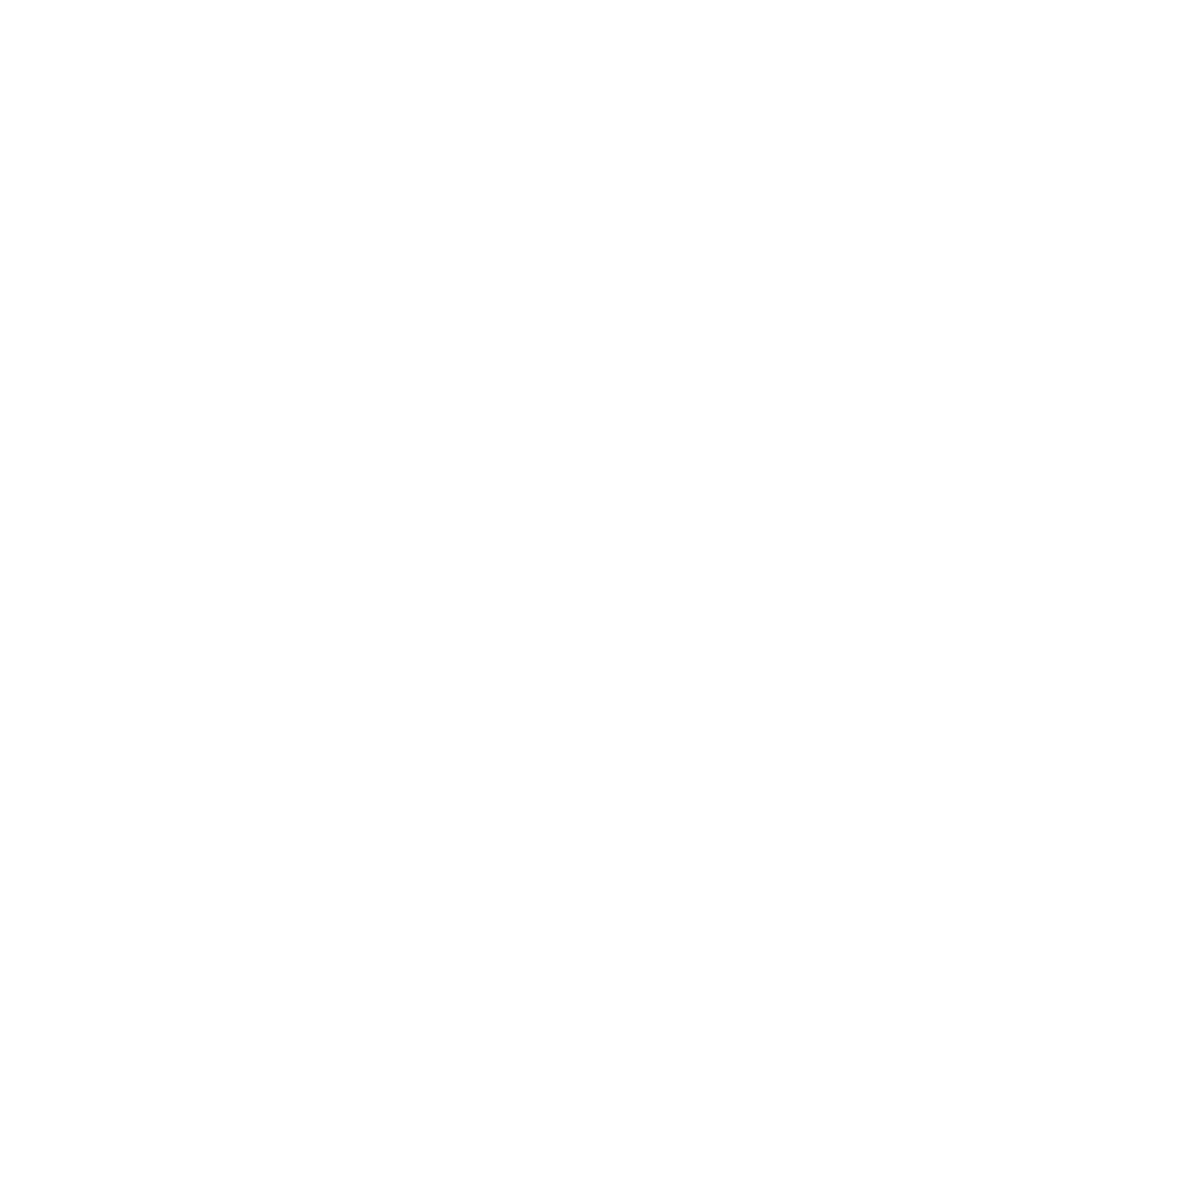

In [10]:
soup.prettify()

<!DOCTYPE html>
<html data-n-head="%7B%22lang%22:%7B%22ssr%22:%22en%22%7D%7D" data-n-head-ssr="" lang="en">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width,initial-scale=1,minimum-scale=1" name="viewport"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <style>
   @media only screen and (min-width:767px){.trp-img{width:400px!important;max-width:400px!important}}
  </style>
  <script>
   window.dataLayer=window.dataLayer||[],window.gtag=window.gtag||function(){window.dataLayer.push(arguments)},gtag("js",new Date),window.initialDate=(new Date).toISOString()
  </script>
  <script type="text/partytown">
   window.dataLayer = window.dataLayer || [];
      window.gtag = function() {
      	window.dataLayer.push(arguments);
      };
      gtag('js', new Date(window.initialDate));
  </script>
  <title>
   HDFC Bank Reviews by 34922 Employees 2024 | AmbitionBox
  </title>
  <meta content="2024 AmbitionBox" data-n-head="ssr" name="copyright"/>
  <meta content="1
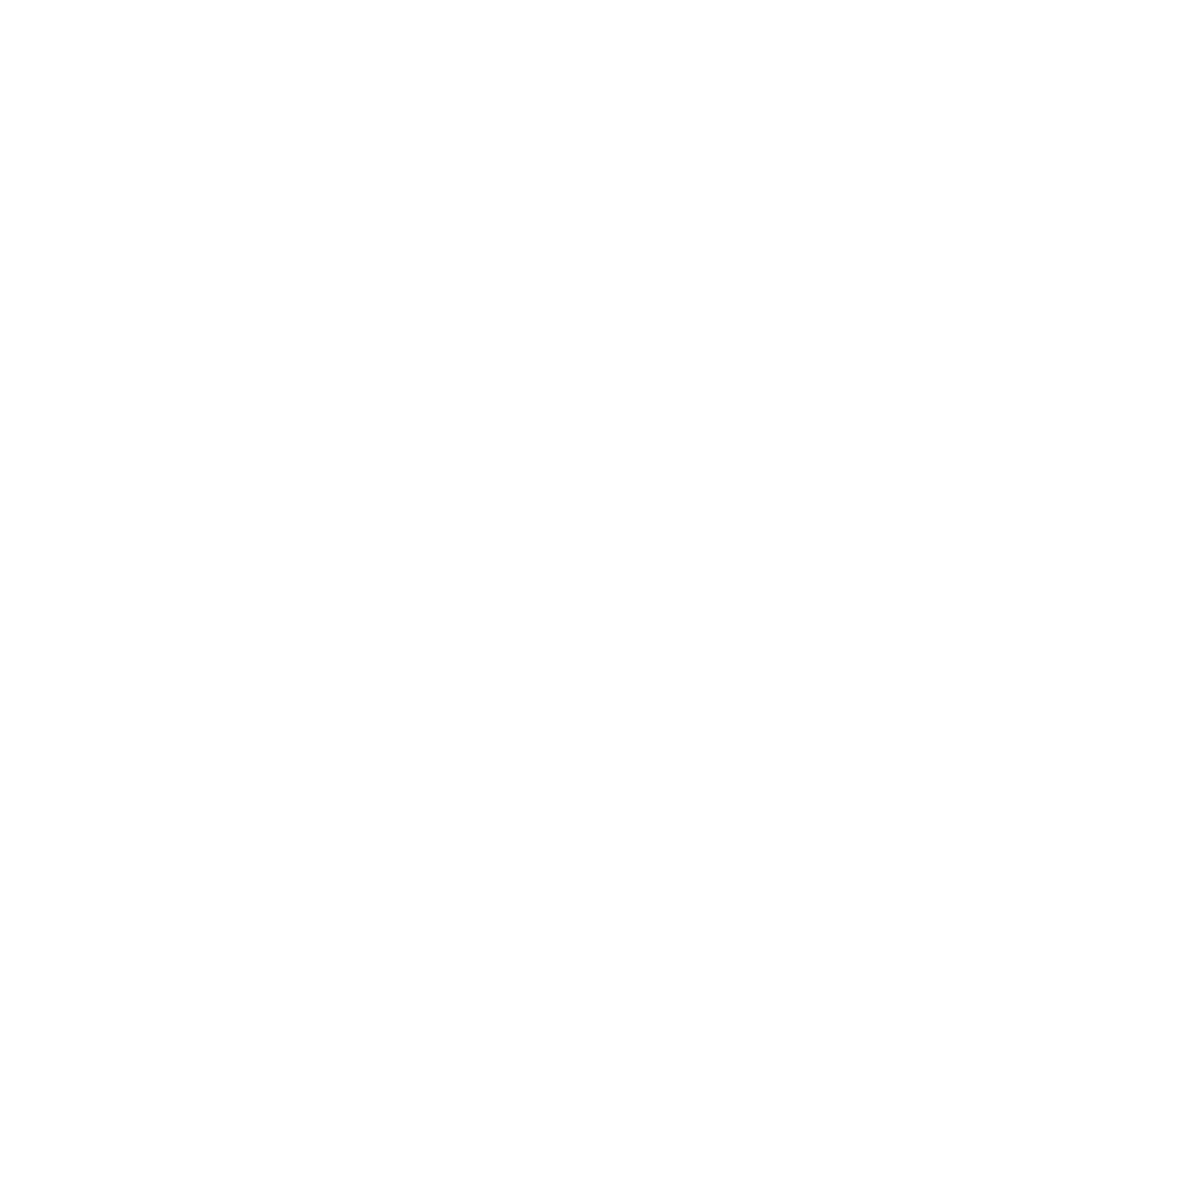

In [11]:
print(soup.prettify())

In [12]:
soup.find_all('h1')

[<h1 class="title paddingFix bold-title-l" style="font-size:1.5rem;">
 			HDFC Bank Reviews
 			 <!-- --></h1>]

In [13]:
soup.find_all('h1')[0].text.strip()

'HDFC Bank Reviews'

### Department from where the reviews are getting

In [18]:
soup.find_all('p',class_ = 'jobTypeBox-p sbold-list-header')[0].text.strip()

'Finance Department'

## rating from single employee

In [24]:
soup.find_all('span',class_ = "avg-rating bold-Labels icon icon-star")[0].text.strip()

'4.0'

### Comments based on ratings

In [31]:
soup.find_all('p',class_ = "body-medium overflow-wrap")[0].text.strip()

'i had joined as fresher and the working environment is good to kickstart your journey.'

## Considering the whole container

In [32]:
hdfc = soup.find_all('div', class_ = 'ab_comp_review_card no-brd-bottom')

In [33]:
len(hdfc)

7

In [38]:
dept = []
rating = []
comments = []
for i in hdfc:
    
    dept.append(i.find_all('p',class_ = 'jobTypeBox-p sbold-list-header')[0].text.strip())
    rating.append(i.find_all('span',class_ = "avg-rating bold-Labels icon icon-star")[0].text.strip())
    comments.append(i.find_all('p',class_ = "body-medium overflow-wrap")[0].text.strip())

In [35]:
dept

['Finance Department',
 'Product Management - Technology Department',
 'Sales Support & Operations Department',
 'Retail & B2C Sales Department',
 'Banking Operations Department',
 'Banking Operations Department',
 'Banking Operations Department']

In [37]:
rating

['4.0', '1.0', '5.0', '5.0', '5.0', '5.0', '4.0']

In [41]:
comments

['i had joined as fresher and the working environment is good to kickstart your journey.',
 "I'm working here from last 1 year no growth path was given to me they switch you team to team like football. And will not give you any promotion untill you have good senior connections. Not a good work culture.",
 'HDFC Bank is an exceptional workplace that fosters professional growth and provides ample opportunities for advancement.',
 'Working knowledge is so good and if you learning is good you have prove to its your development skills knowledge.',
 'It was a good experience',
 'The management and work environment is absolutely excellent even customer gives good businesses as well because of service',
 'If your are joining HDFC Bank must check if YOUR PBA is a young lady or not. IF she is an young lady and got to be PBA then she has arrogancy over everything. This I feeling you because I resigned due to this problem and some of my collogues I met in my traing having young lady PBA resigned t

## Creating dataframe for all the pages

In [42]:
final = pd.DataFrame()
for j in range(1,1001):
    headers={'User-Agent':'Mozilla/5.0 (Windows NT 6.3; Win 64 ; x64) Apple WeKit /537.36(KHTML , like Gecko) Chrome/80.0.3987.162 Safari/537.36'}
    webpage = requests.get('https://www.ambitionbox.com/reviews/hdfc-bank-reviews?page={}'.format(j), headers = headers).text
    soup = BeautifulSoup(webpage,'lxml')
    hdfc = soup.find_all('div', class_ = 'ab_comp_review_card no-brd-bottom')
    dept = []
    rating = []
    comments = []
    
    for i in hdfc:
        
        try:
            dept.append(i.find_all('p',class_ = 'jobTypeBox-p sbold-list-header')[0].text.strip())
            
        except:
            dept.append(np.nan)
            
        try:
            rating.append(i.find_all('span',class_ = "avg-rating bold-Labels icon icon-star")[0].text.strip())
 
        except:
            rating.append(np.nan)
            
        try:
            comments.append(i.find_all('p',class_ = "body-medium overflow-wrap")[0].text.strip())
            
        except:
            comments.append(np.nan)
            
    df = pd.DataFrame({ 'Dept':dept, "rating": rating, 'Comments':comments})
    final = final.append(df, ignore_index= True)
            

            
    

C:\Users\Kalyan\AppData\Local\Temp\ipykernel_21992\2916850861.py:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final = final.append(df, ignore_index= True)


In [45]:
final.head(50)

,Dept,rating,Comments
0,Finance Department,4.0,i had joined as fresher and the working enviro...
1,Product Management - Technology Department,1.0,I'm working here from last 1 year no growth pa...
2,Sales Support & Operations Department,5.0,HDFC Bank is an exceptional workplace that fos...
3,Retail & B2C Sales Department,5.0,Working knowledge is so good and if you learni...
4,Banking Operations Department,5.0,It was a good experience
5,Banking Operations Department,5.0,The management and work environment is absolut...
6,Banking Operations Department,4.0,If your are joining HDFC Bank must check if YO...
7,Merchandising & Planning Department,4.0,Salary comes on 25 th of every month
8,Banking Operations Department,2.0,Secure Job
9,Operations Department,4.0,Being a Collections Manager Its quite hard on ...


In [47]:
final.to_csv('hdfc_reviews_ambition_box_website.csv')